In [26]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Create Dataset

In [0]:
N = 1000 # 1000 data points
X = np.random.random((N, 2)) * 6 -  3 # Samples of uniform distribution from -3 to 3
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

## EDA

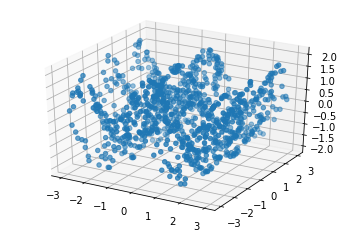

In [47]:
fig = plt.figure()
scatter_plt = fig.add_subplot(111, projection='3d')
scatter_plt.scatter(X[:,0], X[:,1], Y)

# Build Model

In [0]:
i = Input(shape=(2,))
x = Dense(128, activation='relu')(i)
x = Dense(1,)(x)

model = Model(i, x)

opt = Adam(0.01)

model.compile(optimizer=opt,
              loss='mse',)

In [62]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9964
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9380
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9130
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8880
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8617
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8135
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6763
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6437
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5867
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5354
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5280
Epoch 13/100
32/32 [=================

# Evaluate Model

Text(0.5, 0, 'Epoch')

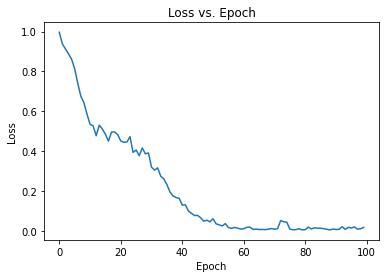

In [63]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.title("Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

xx [[-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 ...
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]
 [-3.         -2.87755102 -2.75510204 ...  2.75510204  2.87755102
   3.        ]]
(50, 50)
yy [[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.87755102 -2.87755102 -2.87755102 ... -2.87755102 -2.87755102
  -2.87755102]
 [-2.75510204 -2.75510204 -2.75510204 ... -2.75510204 -2.75510204
  -2.75510204]
 ...
 [ 2.75510204  2.75510204  2.75510204 ...  2.75510204  2.75510204
   2.75510204]
 [ 2.87755102  2.87755102  2.87755102 ...  2.87755102  2.87755102
   2.87755102]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]
(50, 50)
xx.flatt

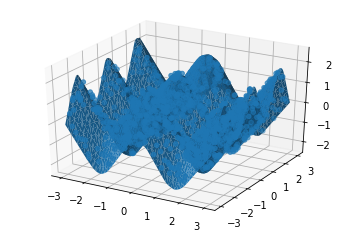

In [71]:
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
print("xx", xx)
print(xx.shape)
print("yy", yy)
print(yy.shape)
print("xx.flatten", xx.flatten())
print(xx.flatten().shape)
print('yy.flatten', yy.flatten())
print(yy.flatten().shape)
print('vstack', np.vstack((xx.flatten(), yy.flatten())))
print(np.vstack((xx.flatten(), yy.flatten())).shape)
print('vstack T', np.vstack((xx.flatten(), yy.flatten())).T)
print(np.vstack((xx.flatten(), yy.flatten())).T.shape)
print('Xgrid', Xgrid)
print(Xgrid.shape)
print("model.predict(Xgrid)")
print(model.predict(Xgrid))
print(model.predict(Xgrid).shape)
print("model.predict(Xgrid).flatten()")
print(model.predict(Xgrid).flatten())
print(model.predict(Xgrid).flatten().shape)
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

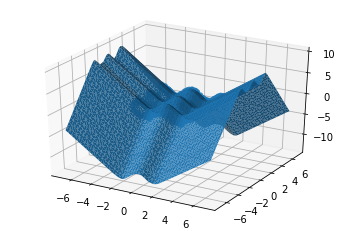

In [73]:
# Extrapolating
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-7, 7, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()